In [15]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [16]:
samples = [
    "2Mu2E_100GeV_0p25GeV_0p02mm",
    "2Mu2E_100GeV_0p25GeV_0p2mm",
    "2Mu2E_100GeV_0p25GeV_2mm",
    "2Mu2E_100GeV_0p25GeV_10mm",
    "2Mu2E_100GeV_0p25GeV_20mm"
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["baseNoLj", "pvAndCosmic_cuts"] #"2mu2e"
p = sidm_processor.SidmProcessor(
    channels,
    ["electron_extra", "base"  

    ],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj

# |∆ηseed|:

tracking based variable, |∆η| between GSF track and supercluster seed.

Text(0, 1, 'Number of Events')

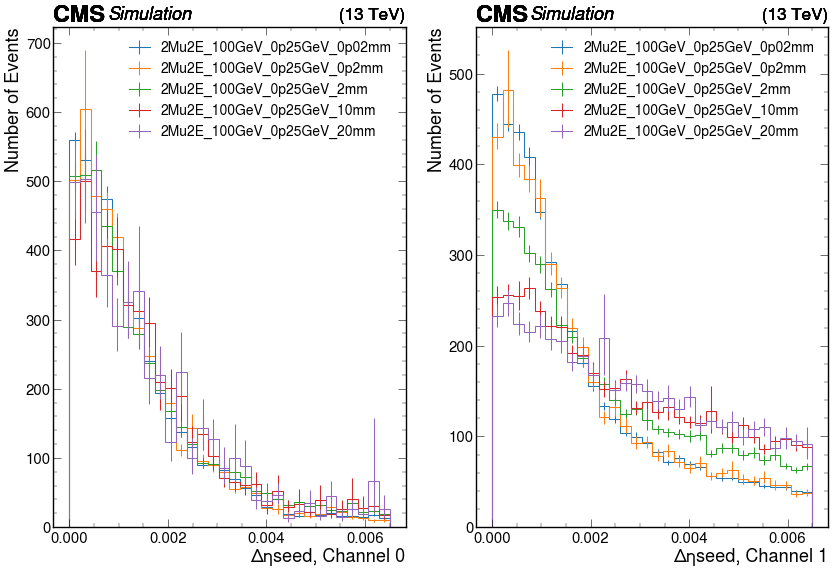

In [17]:
#for sample in samples:
    #hists = out[sample]["hists"]
    #utilities.plot(hists["electron_GsfEleDEtaInSeedCut"][channels [0],:], label = sample, density = True)
#plt.legend()
#plt.xlabel("Δηseed")
#plt.ylabel("Number of Events")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleDEtaInSeedCut"][channels[0], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("Δηseed, Channel 0")
plt.ylabel("Number of Events")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleDEtaInSeedCut"][channels[1], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("Δηseed, Channel 1")
plt.ylabel("Number of Events")


# |∆φin|:

tracking based variable, |∆φ| between GSF track and supercluster.

Text(0, 1, 'Number of Events')

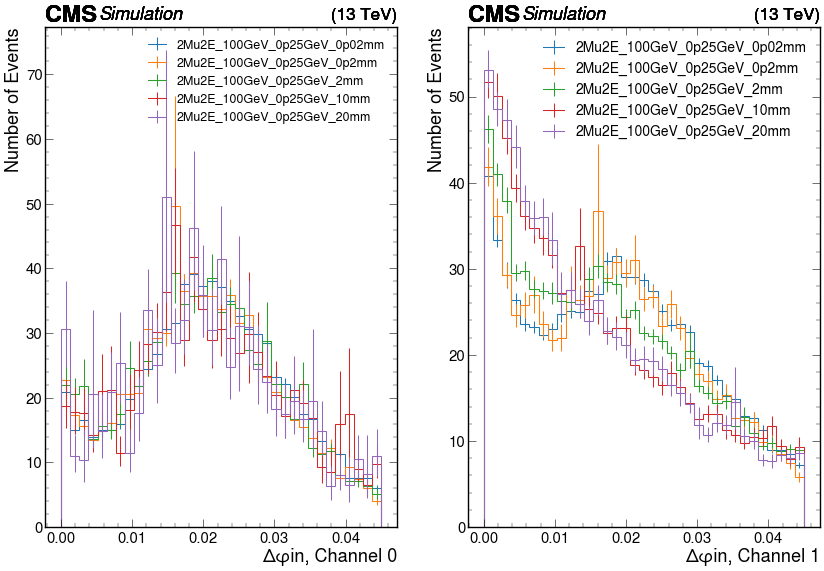

In [18]:
#for sample in samples:
    #hists = out[sample]["hists"]
    #utilities.plot(hists["electron_GsfEleDPhiInCut"][channels [0],:], label = sample, density = True)
#plt.legend()
#plt.xlabel("Δφin")
#plt.ylabel("Number of Events")


for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleDPhiInCut"][channels[0], :], label = sample, density = True)
plt.legend(prop={'size': 18})
plt.xlabel("Δφin, Channel 0")
plt.ylabel("Number of Events")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleDPhiInCut"][channels[1], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("Δφin, Channel 1")
plt.ylabel("Number of Events")

# |1/E - 1/𝒑|: 

absolute value of the difference between the ECAL supercluster energy inverse and the GSF track momentum inverse.


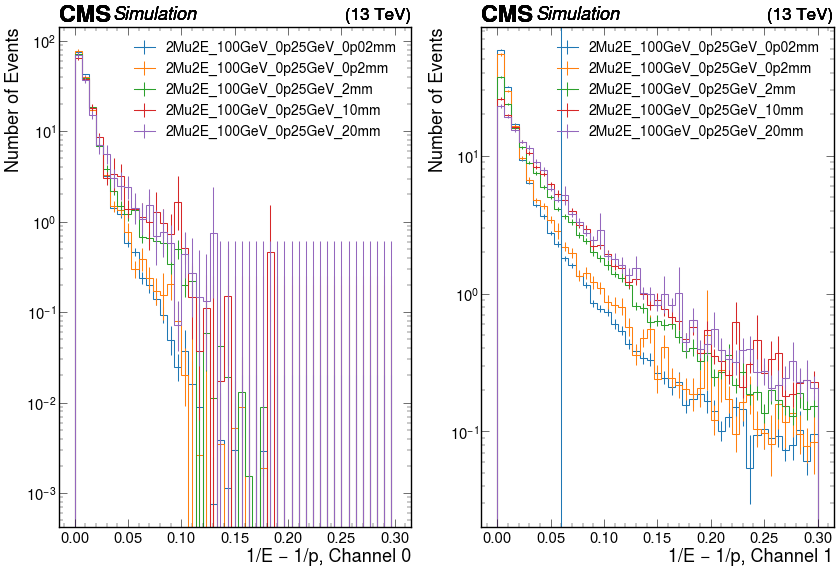

In [19]:
#for sample in samples:
    #hists = out[sample]["hists"]
    #utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut"][channels [0],:], label = sample, density = True)
#plt.legend(loc="upper right", prop={'size': 20})
#plt.xlabel("1/E − 1/p")
#plt.ylabel("Number of Events")
#plt.yscale("log")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleEInverseMinusPInverseCut"][channels[0], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("1/E − 1/p, Channel 0")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleEInverseMinusPInverseCut"][channels[1], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("1/E − 1/p, Channel 1")
plt.ylabel("Number of Events")
plt.yscale("log")

plt.axvline(x=.06)

# Isolation:
relative isolation value with effective area corrections. It is calculated by considering all PFCandidates whose distance to the electron in question satisfies ∆R < 0.3 in the (η, φ) plane:

Iso = (Isoch + Isonh + Isopho)/pT

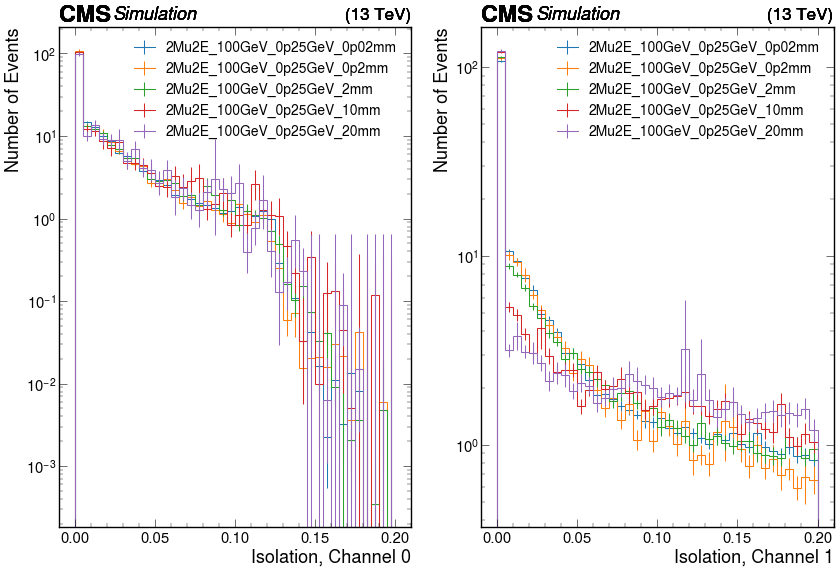

In [20]:
#for sample in samples:
  #  hists = out[sample]["hists"]
 #   utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut"][channels [0],:], label = sample, density = True)
#plt.legend( prop={'size': 20})
#plt.xlabel("Isolation")
#plt.ylabel("Number of Events")
#plt.yscale("log")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleRelPFIsoScaledCut"][channels[0], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("Isolation, Channel 0")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleRelPFIsoScaledCut"][channels[1], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("Isolation, Channel 1")
plt.ylabel("Number of Events")
plt.yscale("log")

# σiηiη:

shower shape variable, defined as the energy-weighted standard deviation of
a single crystal eta within the 5 × 5 crystals centered at the crystal with maximum
energy.

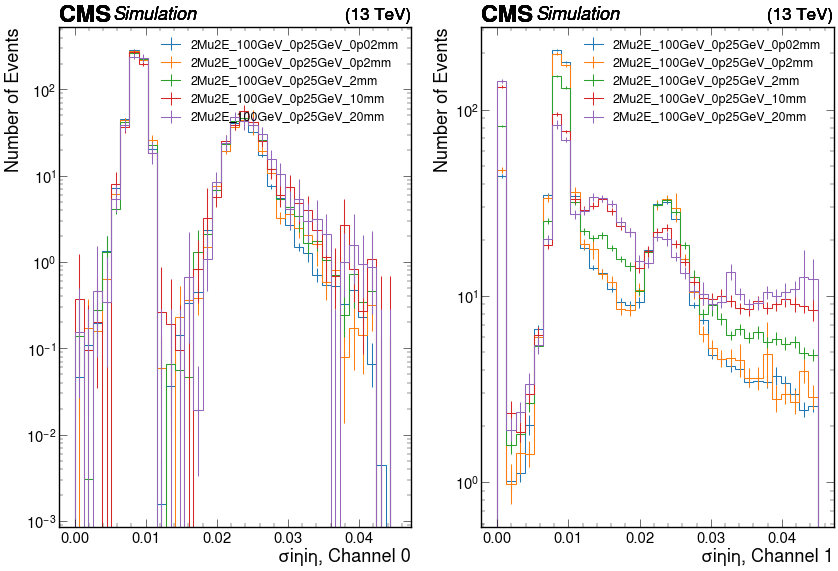

In [21]:
#for sample in samples:
 #   hists = out[sample]["hists"]
  #  utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut"][channels [0],:], label = sample, density = True)
#plt.legend(loc="upper right", prop={'size': 18})
#plt.xlabel("σiηiη")
#plt.ylabel("Number of Events")
#plt.yscale("log")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleFull5x5SigmaIEtaIEtaCut"][channels[0], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 18})
plt.xlabel("σiηiη, Channel 0")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleFull5x5SigmaIEtaIEtaCut"][channels[1], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 18})
plt.xlabel("σiηiη, Channel 1")
plt.ylabel("Number of Events")
plt.yscale("log")

# Conversion veto: 

veto designed to identify electrons from photon conversions. A simple test to determine whether an electron fails or passes through the ID in an event. 

Text(0, 1, 'Number of Events')

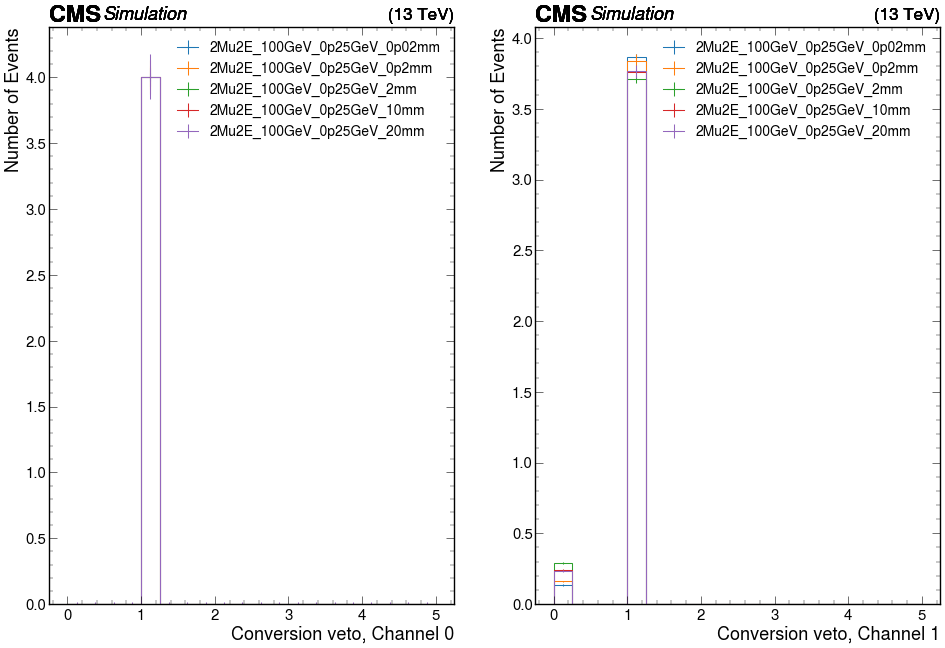

In [22]:
#for sample in samples:
 #   hists = out[sample]["hists"]
  #  utilities.plot(hists["electron_GsfEleConversionVetoCut"][channels [1],:], label = sample, density = True)
#plt.legend(loc="upper right", prop={'size': 18})
#plt.xlabel("Conversion veto")
#plt.ylabel("Number of Events")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(23, 15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleConversionVetoCut"][channels[0], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 20})
plt.xlabel("Conversion veto, Channel 0")
plt.ylabel("Number of Events")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleConversionVetoCut"][channels[1], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 20})
plt.xlabel("Conversion veto, Channel 1")
plt.ylabel("Number of Events")

# H/E:

ratio of the energy deposited in the single closest HCAL tower to the supercluster position inside a cone of ∆R = 0.15 in the (η, φ) plane to the energy deposited at ECAL.

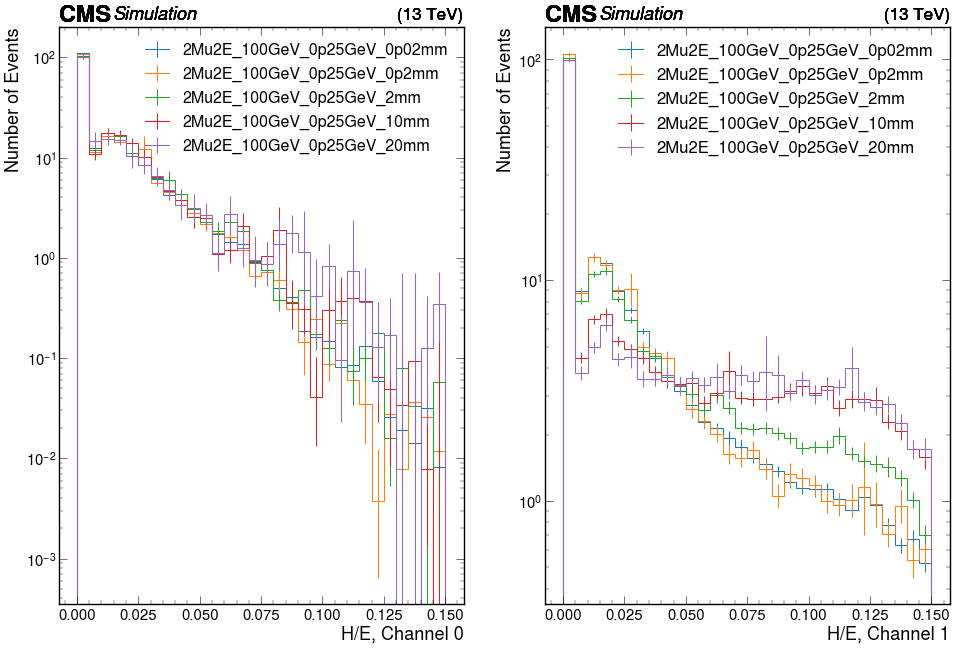

In [23]:
#for sample in samples:
 #   hists = out[sample]["hists"]
  #  utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut"][channels [0],:], label = sample, density = True)
#plt.legend(loc="upper right", prop={'size': 20})
#plt.xlabel("H/E")
#plt.ylabel("Number of Events")
#plt.yscale("log")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(23, 15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleHadronicOverEMEnergyScaledCut"][channels[0], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 23})
plt.xlabel("H/E, Channel 0")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleHadronicOverEMEnergyScaledCut"][channels[1], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 24})
plt.xlabel("H/E, Channel 1")
plt.ylabel("Number of Events")
plt.yscale("log")

# Expected missing inner hits:

number of missing hits expected for GSF track.

Text(0, 1, 'Number of Events')

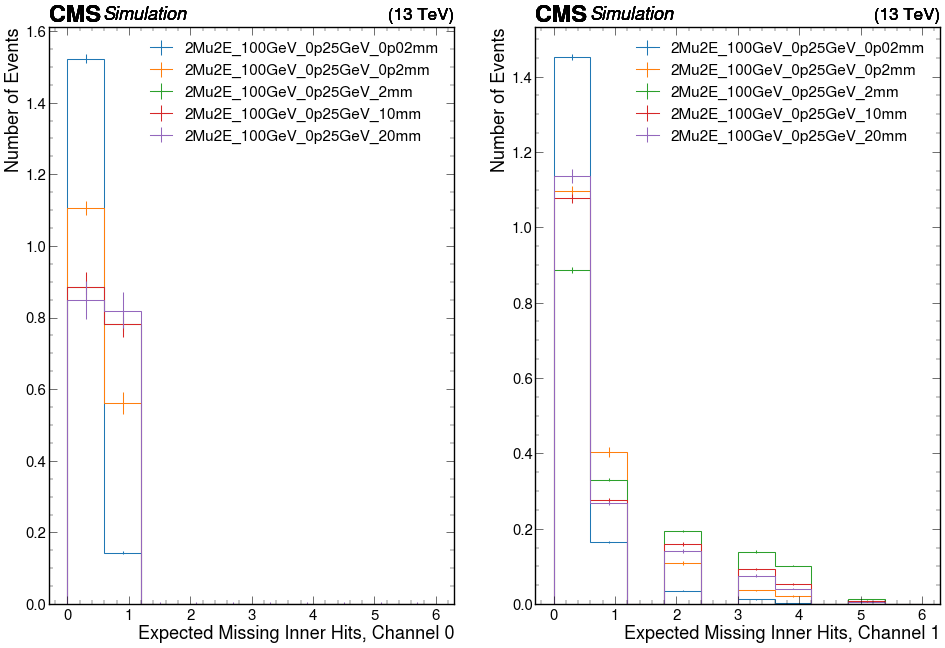

In [24]:
#for sample in samples:
   # hists = out[sample]["hists"]
    #utilities.plot(hists["electron_GsfEleMissingHitsCut"][channels [1],:], label = sample, density = True)
#plt.legend(loc="upper right", prop={'size': 20})
#plt.xlabel("Expected Missing Inner Hits")
#plt.ylabel("Number of Events")


for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(23, 15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleMissingHitsCut"][channels[0], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 22})
plt.xlabel("Expected Missing Inner Hits, Channel 0")
plt.ylabel("Number of Events")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleMissingHitsCut"][channels[1], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 22})
plt.xlabel("Expected Missing Inner Hits, Channel 1")
plt.ylabel("Number of Events")

In [25]:
#Q: how variables chanae with displacement, pick a boundatate mass and a photon mass where only displacemt is changing
#vertical line where the cut is according to the table in the analysis